<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part2/P2_Ch02_CH04_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression(N Feature)

<ipython-input-17-97769b1f0126>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data>0.5).astype(np.int) # 0.5이상은 1 아니면 0
<ipython-input-17-97769b1f0126>:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated

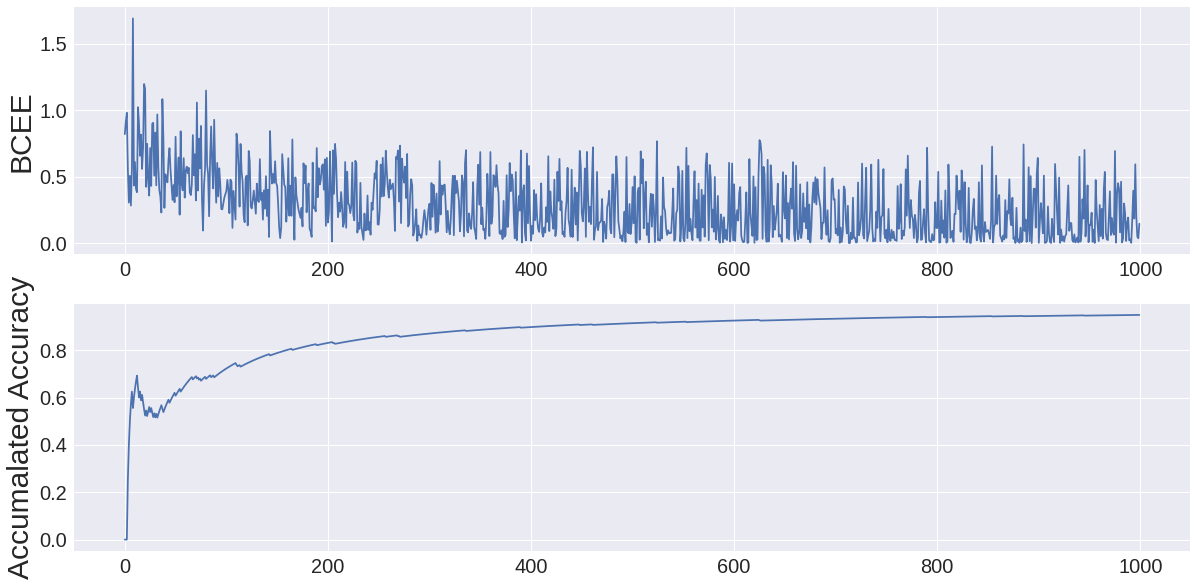

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
plt.style.use('seaborn')

#set params
N, n_feature = 1000, 2
lr = 0.03
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

#generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1/(1 + np.exp(-y_data))
y_data = (y_data>0.5).astype(np.int) # 0.5이상은 1 아니면 0

# print(x_data.shape, y_data.shape)
J_track , acc_track = list(), list()
n_correct = 0
for data_idx , (X, y) in enumerate(zip(x_data, y_data)):
  #forward propagation
  z = X @ W + b
  pred = 1/(1+np.exp(-z))
  J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
  J_track.append(J.squeeze())
  
  #calculate accumalated accuracy
  pred_ = (pred>0.5).astype(np.int).squeeze()
  # print(pred, pred_,y)
  if pred_ == y:
    n_correct +=1
  acc_track.append(n_correct/(data_idx + 1))

  #jacobians
  dJ_dpred = (pred - y )/(pred*(1-pred))
  dpred_dz = pred*(1-pred)
  dz_dW = X.reshape(1,-1) # row vector로 바꾸기
  dz_db = 1

  #backpropagation
  dJ_dz = dJ_dpred * dpred_dz
  dJ_dW = dJ_dz * dz_dW
  dJ_db = dJ_dz * dz_db 

  #parameter update
  W = W - lr*dJ_dW.T
  b = b- lr*dJ_db

#visualize results
fig, axes = plt.subplots(2,1, figsize = (20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel('BCEE', fontsize = 30)
axes[0].tick_params(labelsize = 20)
axes[1].set_ylabel('Accumalated Accuracy', fontsize = 30)
axes[1].tick_params(labelsize = 20)
